In [1]:
import pandas as pd # импортируем Pandas
%matplotlib inline

In [2]:
data = pd.read_csv('C:/Users/HYPERPC/Downloads/train.csv')

# Анализ статистики выживаемости пассажиров Титаника в зависимости от различных условий

In [4]:
print('Количество пассажиров: ', data.PassengerId.nunique())
print('Процент выживших: {} %'.format(int(100 * data['Survived'].sum() / data.PassengerId.nunique())))

Количество пассажиров:  891
Процент выживших: 38 %


# Предположение первое: на шанс выжить влиял пол пассажира


### Одним из самых очевидных предположений, которое мы знаем из различных документальных и не очень фильмов, является тот факт, что женщины были в большем приоритете при посадке в спасательные шлюпки.

<AxesSubplot:>

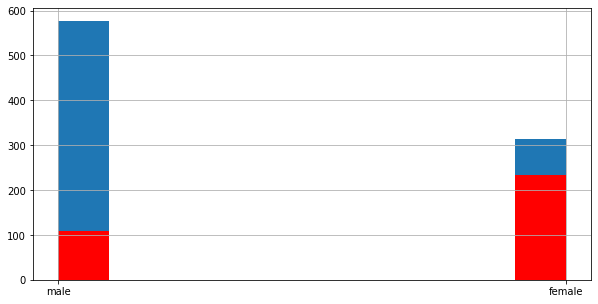

In [8]:
data.Sex.hist(figsize=(10, 5))
data[data['Survived'] == 1].Sex.hist(color='red', grid=True)

### Из построенных данных, видим, что, действительно, процент выживших женщин много больше, чем процент выживыших мужчин.

In [19]:
print('Количество мужчин:',len(data[(data['Sex'] == 'male')].values))
print('Процент выживших мужчин: {} %'.format(int(100 *len(data[(data['Sex'] == 'male')&(data['Survived'] == 1)].values)/len(data[(data['Sex'] == 'male')].values))))


Количество мужчин: 577
Процент выживших мужчин: 18 %


In [22]:
print('Количество женщин:',len(data[(data['Sex'] == 'female')].values))
print('Процент выживших женщин: {} %'.format(int(100 *len(data[(data['Sex'] == 'female')&(data['Survived'] == 1)].values)/len(data[(data['Sex'] == 'female')].values))))

Количество женщин: 314
Процент выживших женщин: 74 %


### Но всё же, есть вероятность, что все спасшиеся женщины, принадлежали более высокому классу. Поэтому небходимо проверить по каждому классу непосредственную статистику

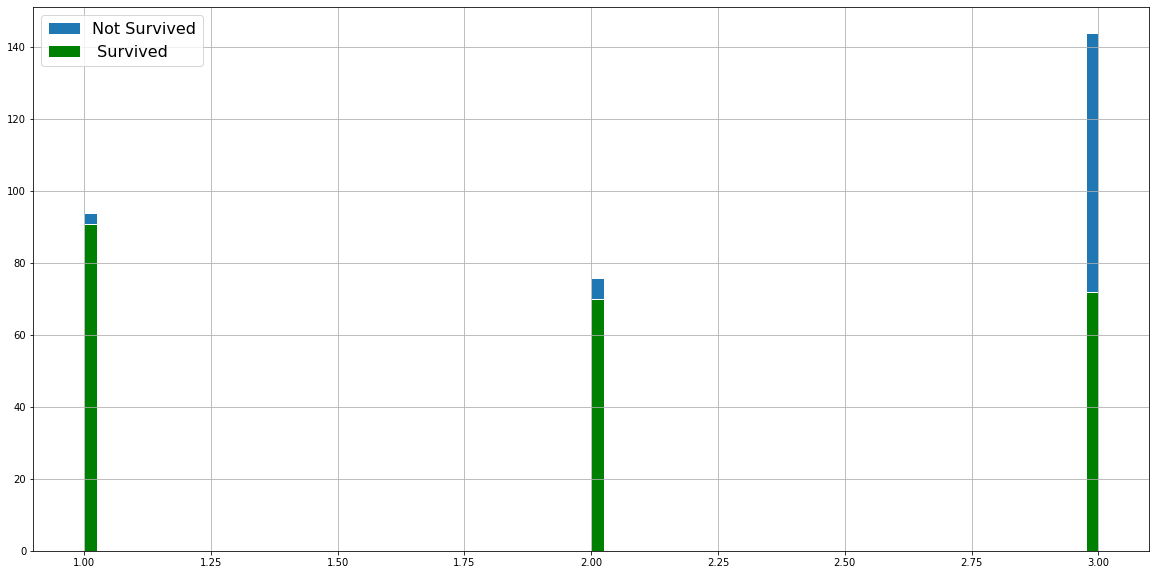

In [27]:
ax = data[data['Sex']=='female']['Pclass'].hist(figsize=(20, 10), bins=80, edgecolor='white', grid=True)
data[(data['Survived'] == 1)&(data['Sex']=='female')]['Pclass'].hist(figsize=(20, 10), bins=80, 
                                          edgecolor='white', grid=True, color='green')
ax.legend(['Female not Survived', ' Survived'], prop={'size':16})


In [33]:
print('Количество женщин первого класса:',len(data[(data['Sex'] == 'female')&((data['Pclass'] == 1))].values))
print('Процент выживших женщин: {} %'.format(int(100 *len(data[(data['Sex'] == 'female')&(data['Survived'] == 1)&((data['Pclass'] == 1))].values)/len(data[(data['Sex'] == 'female')&((data['Pclass'] == 1))].values))))
print('Количество женщин второго класса:',len(data[(data['Sex'] == 'female')&((data['Pclass'] == 2))].values))
print('Процент выживших женщин: {} %'.format(int(100 *len(data[(data['Sex'] == 'female')&(data['Survived'] == 1)&((data['Pclass'] == 2))].values)/len(data[(data['Sex'] == 'female')&((data['Pclass'] == 2))].values))))
print('Количество женщин третьего класса:',len(data[(data['Sex'] == 'female')&((data['Pclass'] == 3))].values))
print('Процент выживших женщин: {} %'.format(int(100 *len(data[(data['Sex'] == 'female')&(data['Survived'] == 1)&((data['Pclass'] == 3))].values)/len(data[(data['Sex'] == 'female')&((data['Pclass'] == 3))].values))))

Количество женщин первого класса: 94
Процент выживших женщин: 96 %
Количество женщин второго класса: 76
Процент выживших женщин: 92 %
Количество женщин третьего класса: 144
Процент выживших женщин: 50 %


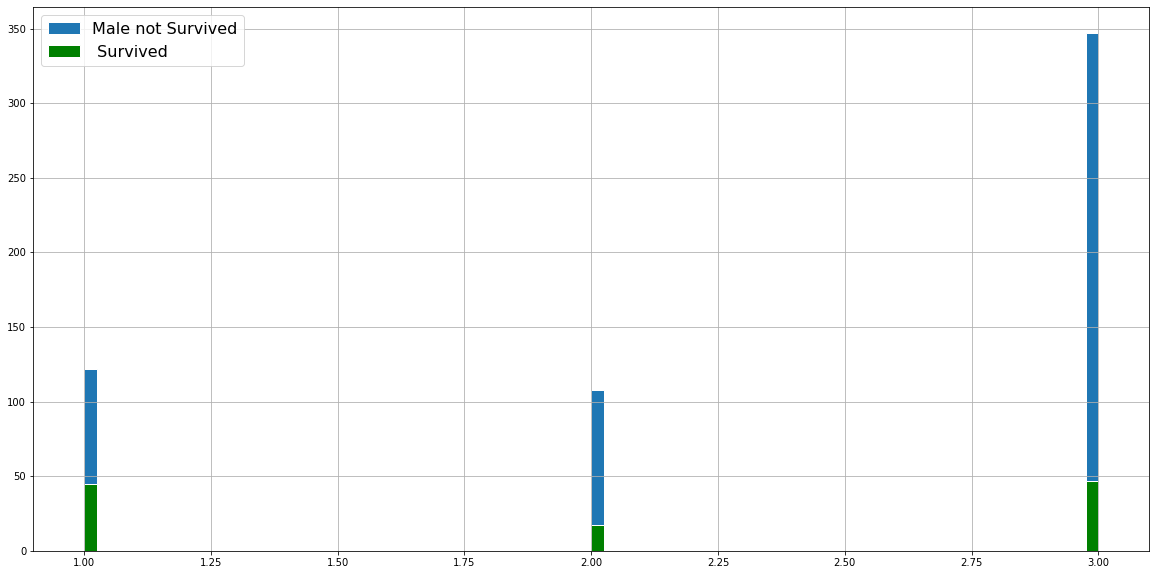

In [28]:
ax = data[data['Sex']=='male']['Pclass'].hist(figsize=(20, 10), bins=80, edgecolor='white', grid=True)
data[(data['Survived'] == 1)&(data['Sex']=='male')]['Pclass'].hist(figsize=(20, 10), bins=80, 
                                          edgecolor='white', grid=True, color='green')
ax.legend(['Male not Survived', ' Survived'], prop={'size':16})


In [35]:
print('Количество мужчин первого класса:',len(data[(data['Sex'] == 'male')&((data['Pclass'] == 1))].values))
print('Процент выживших мужчин: {} %'.format(int(100 *len(data[(data['Sex'] == 'male')&(data['Survived'] == 1)&((data['Pclass'] == 1))].values)/len(data[(data['Sex'] == 'male')&((data['Pclass'] == 1))].values))))
print('Количество мужчин второго класса:',len(data[(data['Sex'] == 'female')&((data['Pclass'] == 2))].values))
print('Процент выживших мужчин: {} %'.format(int(100 *len(data[(data['Sex'] == 'male')&(data['Survived'] == 1)&((data['Pclass'] == 2))].values)/len(data[(data['Sex'] == 'male')&((data['Pclass'] == 2))].values))))
print('Количество мужчин третьего класса:',len(data[(data['Sex'] == 'female')&((data['Pclass'] == 3))].values))
print('Процент выживших мужчин: {} %'.format(int(100 *len(data[(data['Sex'] == 'male')&(data['Survived'] == 1)&((data['Pclass'] == 3))].values)/len(data[(data['Sex'] == 'male')&((data['Pclass'] == 3))].values))))

Количество мужчин первого класса: 122
Процент выживших мужчин: 36 %
Количество мужчин второго класса: 76
Процент выживших мужчин: 15 %
Количество мужчин третьего класса: 144
Процент выживших мужчин: 13 %


### Действительно, на основе этих данных мы видим, что доля выживших мужчин в любом классе много меньше, чем доля выживших женщин. Что позволяет судить о том, что в любом классе приоритет по спасению отдавали женщинам

# Предположение второе: На шанс выжить влиял порт, в котором человек зашёл на борт

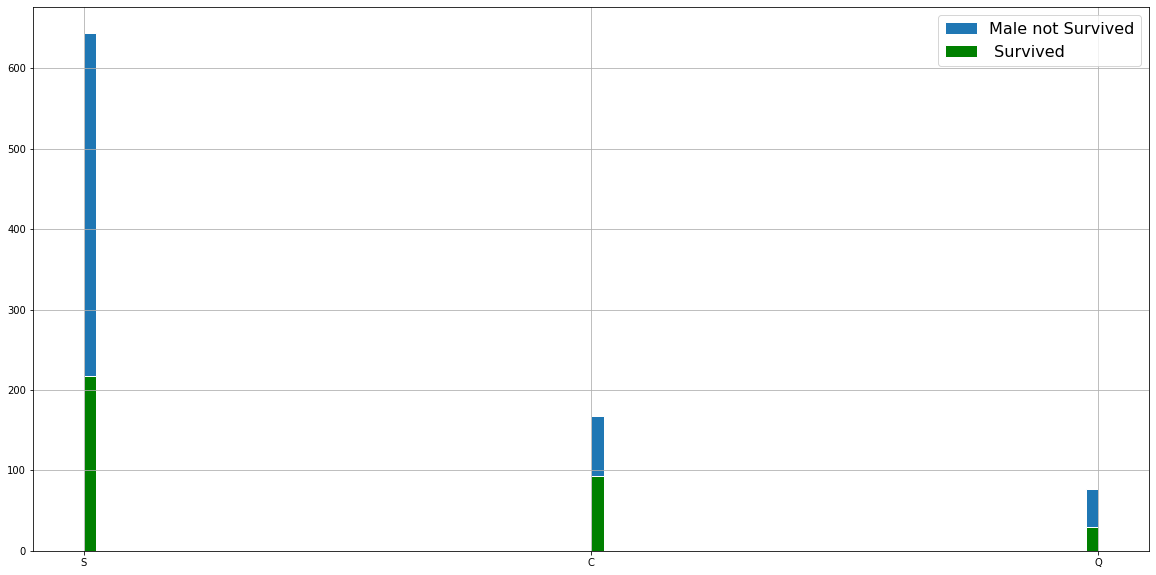

In [9]:
ax = data['Embarked'].hist(figsize=(20, 10), bins=80, edgecolor='white', grid=True)
data[(data['Survived'] == 1)]['Embarked'].hist(figsize=(20, 10), bins=80, 
                                          edgecolor='white', grid=True, color='green')
ax.legend(['Male not Survived', ' Survived'], prop={'size':16})


Посчитаем процент выживших для каждого порта

In [19]:
print('Количество людей, севших в Южном Хэмптоне',len(data[((data['Embarked'] == 'S'))].values))
print('Процент выживших : {} %'.format(int(100 *len(data[(data['Survived'] == 1)&((data['Embarked'] == 'S'))].values)/len(data[((data['Embarked'] == 'S'))].values))))
print('Количество людей, севших в Шербуре',len(data[((data['Embarked'] == 'C'))].values))
print('Процент выживших : {} %'.format(int(100 *len(data[(data['Survived'] == 1)&((data['Embarked'] == 'C'))].values)/len(data[((data['Embarked'] == 'C'))].values))))
print('Количество людей, севших в Квинстауне',len(data[((data['Embarked'] == 'Q'))].values))
print('Процент выживших : {} %'.format(int(100 *len(data[(data['Survived'] == 1)&((data['Embarked'] == 'Q'))].values)/len(data[((data['Embarked'] == 'Q'))].values))))

Количество людей, севших в Южном Хэмптоне 644
Процент выживших : 33 %
Количество людей, севших в Шербуре 168
Процент выживших : 55 %
Количество людей, севших в Квинстауне 77
Процент выживших : 38 %


### По графику видно, что процент выживших, в порте C. т.е Шербуре, который является вторым портом в маршруте титаника.

Но возможно в этом порту село очень много женщин, из-за чего могла возникнуть такая большая вероятность. Надо проверить соотношение женщин и мужчин в каждом порту


In [20]:
print('Количество людей, севших в Южном Хэмптоне',len(data[((data['Embarked'] == 'S'))].values))
print('Процент женщин : {} %'.format(int(100 *len(data[(data['Sex'] == 'female')&((data['Embarked'] == 'S'))].values)/len(data[((data['Embarked'] == 'S'))].values))))
print('Количество людей, севших в Шербуре',len(data[((data['Embarked'] == 'C'))].values))
print('Процент женщин : {} %'.format(int(100 *len(data[(data['Sex'] == 'female')&((data['Embarked'] == 'C'))].values)/len(data[((data['Embarked'] == 'C'))].values))))
print('Количество людей, севших в Квинстауне',len(data[((data['Embarked'] == 'Q'))].values))
print('Процент женщин : {} %'.format(int(100 *len(data[(data['Sex'] == 'female')&((data['Embarked'] == 'Q'))].values)/len(data[((data['Embarked'] == 'Q'))].values))))

Количество людей, севших в Южном Хэмптоне 644
Процент женщин : 31 %
Количество людей, севших в Шербуре 168
Процент женщин : 43 %
Количество людей, севших в Квинстауне 77
Процент женщин : 46 %


Из этих соотношений мы видим что соотношение мужчин к женщинам не самое большое, что свидетельствует о том что не пол так сильно повлиял на такое большое соотношение чисел. Возможно, здесь повлиял класс пасажира, поэтому нам необходимо проверить, как класс пассажира влиял на возможность выжить.

## Предположение третие: Влиял класс пасажира


### Действительно, кажется что и правда, чем богаче пассажир, тем более охотно будут пускать его в шлюпку. Ещё этот факт можно объяснить тем, что люди низших классов жили на нижних палубах, из-за чего пробиться на вверх, пока тонул корабль было очень трудно. Но это всё слова, давайте проверим на данных нашу гипотезу

<AxesSubplot:>

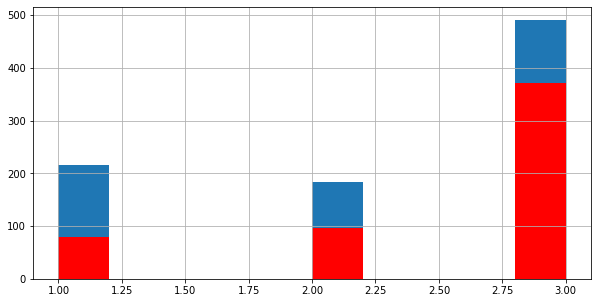

In [21]:
data.Pclass.hist(figsize=(10, 5))
data[data['Survived'] == 0].Pclass.hist(color='red', grid=True)

In [26]:
print('Количество людей первого класса',len(data[((data['Pclass'] == 1))].values))
print('Процент женжин : {} %'.format(int(100 *len(data[((data['Sex'] == 'female'))&((data['Pclass'] == 1))].values)/len(data[((data['Pclass'] == 1))].values))))
print('Количество людей второго класса',len(data[((data['Pclass'] == 2))].values))
print('Процент женщин : {} %'.format(int(100 *len(data[((data['Sex'] == 'female'))&((data['Pclass'] == 2))].values)/len(data[((data['Pclass'] == 2))].values))))
print('Количество людей третьего класса',len(data[((data['Pclass'] == 3))].values))
print('Процент женщин : {} %'.format(int(100 *len(data[((data['Sex'] == 'female'))&((data['Pclass'] == 3))].values)/len(data[((data['Pclass'] == 3))].values))))

Количество людей первого класса 216
Процент женжин : 43 %
Количество людей второго класса 184
Процент женщин : 41 %
Количество людей третьего класса 491
Процент женщин : 29 %


Видно, что самое большое соотношение женщин было в первом классе. (Это объясняется исторически, в то время женщине было трудно заработать на билет на такой корабль, поэтому многим женщинам покупали билеты мужчины). Из чего мы делаем вывод,что класс пассажиров не очень влиял на шанс выжить

### Из предыдущего  предположения мы понимаем, что влияло так же место посадки. Действительно,соотношение пассажиров первого класса, а следовательно и женщин было больше в Шербуре.

In [28]:
print('Количество людей, севших в Южном Хэмптоне',len(data[((data['Embarked'] == 'S'))].values))
print('Процент 1-ого класса : {} %'.format(int(100 *len(data[((data['Embarked'] == 'S'))&((data['Pclass'] == 1))].values)/len(data[((data['Embarked'] == 'S'))].values))))
print('Количество людей, севших в Шербуре',len(data[((data['Embarked'] == 'C'))].values))
print('Процент 1-ого класса : {} %'.format(int(100 *len(data[((data['Embarked'] == 'C'))&((data['Pclass'] == 1))].values)/len(data[((data['Embarked'] == 'C'))].values))))
print('Количество людей, севших в Квинстауне',len(data[((data['Embarked'] == 'Q'))].values))
print('Процент 1-ого класса : {} %'.format(int(100 *len(data[((data['Embarked'] == 'Q'))&((data['Pclass'] == 1))].values)/len(data[((data['Embarked'] == 'Q'))].values))))

Количество людей, севших в Южном Хэмптоне 644
Процент 1-ого класса : 19 %
Количество людей, севших в Шербуре 168
Процент 1-ого класса : 50 %
Количество людей, севших в Квинстауне 77
Процент 1-ого класса : 2 %


# Из всех наших предположений, мы можем сделать вывод, что на шанс выжить оказывали влияние пол человека и город, где он сел ( в то время когда класс, оказывает не очень большое влияние)

## P.s.  Как говорил Уинстон Черчилль: "Людям надо желать удачи, а не богатства и здоровья. Ведь на Титанике многие были богатыми или здоровыми, но выжили самые удачливые".